In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pandas
!pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict

In [156]:
# leitura de arquivo

arq = open("/content/drive/MyDrive/bb100/charts.csv", "r")
linhas = arq.readlines()
# data structure -> date,rank,song,artist,last-week,peak-rank,weeks-on-board

In [166]:
# todas as músicas de um dado artista que entraram na Hot 100 e seu respectivo pico

songs = {}
for linha in linhas:
  if re.search("Black Eyed Peas", linha):
    linha = re.split(r',(?!\s)', linha)
    if songs.get(linha[2]) == None:
      songs[linha[2].replace('"', "")] = int(linha[-2])


# visualização com DataFrame
data = {'Song': songs.keys(), 'Highest Peak':songs.values()}
df = pd.DataFrame(data)
df['Highest Peak'] = pd.to_numeric(df['Highest Peak'])
df.sort_values(by=['Highest Peak'], inplace=True, ignore_index=True)
df = df.style.hide().format_index(str.upper, axis=1)
display(df)
#df.to_csv("/content/drive/MyDrive/bb100/ok.csv")

SONG,HIGHEST PEAK
I Gotta Feeling,1
Imma Be,1
Boom Boom Pow,1
Just Can't Get Enough,3
My Humps,3
Don't Phunk With My Heart,3
The Time (Dirty Bit),4
Meet Me Halfway,7
Where Is The Love?,8
Rock That Body,9


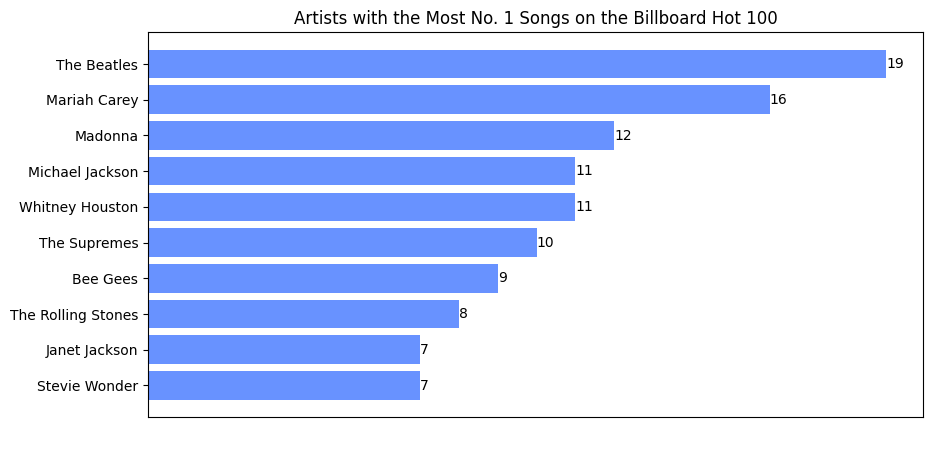

In [155]:
# artistas e respectivas músicas que alcançaram o topo do chart (#1)

artistTop = defaultdict(set)
topSongs = set()
for linha in linhas:
  linha = re.split(r',(?!\s)', linha)
  if linha[5] == "1":
    artistTop[linha[3]].add(linha[2])

a = {}
for artista, musicas in artistTop.items():
  a[artista] = len(musicas)

dfOnes = pd.DataFrame({'Artist': a.keys(), 'Top':a.values()}).sort_values(by=['Top'],ascending=False, ignore_index=True)
subDfOnes = dfOnes.head(10)

# visualização em gráfico de barras horizontais
plt.figure(figsize=(10, 5))
bars = plt.barh(y=subDfOnes.Artist, width=subDfOnes.Top, color="#6892ff")
plt.bar_label(bars)
plt.xticks(color='white')
plt.gca().invert_yaxis()
plt.gca().tick_params(bottom=False)
plt.title("Artists with the Most No. 1 Songs on the Billboard Hot 100")
plt.show()